CS 584 HW 1 Text Classification<br>
Guanghua Zha 9/20/2019<br>

# 1. Processing data

Read in txt file one by one. <br>
Remove those content that added by the website such as copyright by manually  define start and end of the content.<br> 
Remove '\n' and all the punctuation. <br>
Remove title.<br>

In [1]:
import re
import numpy as np
import random
import gc
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

def checkTitle_pg1661(a):
    if type(a)!=str:
        return
    bank=set()
    bank.add('I.')
    bank.add('V.')
    bank.add('X.')
    bank.add('IV')
    bank.add('VI')
    bank.add('IX')
    bank.add('XI')
    bank.add('II')
    bank.add('VI')
    bank.add('XI')
    bank.add('VI')
    if a[0:2] in bank or a[0:13]=="ADVENTURE IV.":
        #print(a)
        return 1
    else:
        return 0

def checkTitle_pg280540(a):
    if type(a)!=str:
        return
    bank=set()
    bank.add('PART ')
    bank.add('Book ')
    bank.add('Chapter ')
    if a[0:8] in bank or a[0:5] in bank:
        #print(a)
        return 1
    else:
        return 0
    
def checkTitle_pg31100(a):
    if type(a)!=str:
        return
    bank=set()
    bank.add('Chapter ')
    bank.add('CHAPTER ')
    
    if a[0:9] in bank :
        #print(a)
        return 1
    else:
        return 0
    
def pg1661():
    fp=open('data/pg1661.txt','r',encoding='utf8');
    start="To Sherlock Holmes she is always THE woman. I have seldom heard\n"
    end="End of the Project Gutenberg EBook of The Adventures of Sherlock Holmes, by \n"
    line=fp.readline()
    while line!=start:
        line=fp.readline()
        
    p=[]
    pAll=''
    while line and line!=end:
        data=line.strip('\n')
        line=fp.readline()
        while line!='\n':
            line=line.strip('\n')
            line=re.sub(r'[^\w\s]','',line)
            data=data+' '+line
            line=fp.readline()
        p.append(data)
        pAll=pAll+' '+data
        while line=='\n' or line.strip()=='' or checkTitle_pg1661(line)==1:
            line=fp.readline()
    fp.close()
    
    return p,pAll
    
def pg31100():
    fp=open('data/pg31100.txt','r',encoding='utf8');
    start="Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,\n"
    end="End of the Project Gutenberg EBook of The Complete Works of Jane Austen,\n"
    line=fp.readline()
    while line!=start:
        
        line=fp.readline()
        
    p=[]
    pAll=''
    while line and line!=end:
        data=line.strip('\n')
        line=fp.readline()
        while line!='\n':
            line=line.strip('\n')
            line=re.sub(r'[^\w\s]','',line)
            data=data+' '+line
            line=fp.readline()
        p.append(data)
        pAll=pAll+' '+data
        while line=='\n' or line.strip()=='' or checkTitle_pg31100(line)==1:
            line=fp.readline()
    fp.close()
    return p,pAll
    
    
    
def pg280540():
    fp=open('data/28054-0.txt','r',encoding='utf8');
    start="Alexey Fyodorovitch Karamazov was the third son of Fyodor Pavlovitch\n"
    end="***END OF THE PROJECT GUTENBERG EBOOK THE BROTHERS KARAMAZOV***\n"
    line=fp.readline()
    while line!=start:
        
        line=fp.readline()
        
    p=[]
    pAll=''
    while line and line!=end:
        data=line.strip('\n')
        line=fp.readline()
        while line!='\n':
            line=line.strip('\n')
            line=re.sub(r'[^\w\s]','',line)
            data=data+' '+line
            line=fp.readline()
        p.append(data)
        pAll=pAll+' '+data
        while line=='\n' or line.strip()=='' or checkTitle_pg280540(line)==1:
            line=fp.readline()
    fp.close()
    return p,pAll

In [2]:
p1,p1All=pg1661()
p2,p2All=pg31100()
p3,p3All=pg280540()



Shuffle the data

In [3]:

random.shuffle(p1)
random.shuffle(p1)
random.shuffle(p2)
random.shuffle(p2)
random.shuffle(p3)
random.shuffle(p3)



Separate the data to training and test set. 70% training and 30% test.

In [4]:
p1Train=p1[:int(len(p1)*0.7)]
p1Test=p1[int(len(p1)*0.7):]
print(len(p1)==len(p1Train)+len(p1Test))
print(len(p1Train))
p2Train=p2[:int(len(p2)*0.7)]
p2Test=p2[int(len(p2)*0.7):]
print(len(p2)==len(p2Train)+len(p2Test))
print(len(p2Train))
p3Train=p3[:int(len(p3)*0.7)]
p3Test=p3[int(len(p3)*0.7):]
print(len(p3)==len(p3Train)+len(p3Test))
print(len(p3Train))

True
1768
True
7734
True
4089


Use tfidVectorizer in sklearn to change the raw text to tfid array. Then preparing training/testing set.

In [5]:
p1TrainAll=''
for para in p1Train:
    p1TrainAll=p1TrainAll+' '+para
    
p2TrainAll=''
for para in p2Train:
    p2TrainAll=p2TrainAll+' '+para
    
p3TrainAll=''
for para in p3Train:
    p3TrainAll=p3TrainAll+' '+para
    
vectorizer = TfidfVectorizer()
vectorizer.fit([p1TrainAll,p2TrainAll,p3TrainAll])
x1T=vectorizer.transform(p1Train).toarray()
x1E=vectorizer.transform(p1Test).toarray()
x2T=vectorizer.transform(p2Train).toarray()
x2E=vectorizer.transform(p2Test).toarray()
x3T=vectorizer.transform(p3Train).toarray()
x3E=vectorizer.transform(p3Test).toarray()

y1T=np.full((len(x1T),3),[1,0,0])
y1E=np.full((len(x1E),3),[1,0,0])
y2T=np.full((len(x2T),3),[0,1,0])
y2E=np.full((len(x2E),3),[0,1,0])
y3T=np.full((len(x3T),3),[0,0,1])
y3E=np.full((len(x3E),3),[0,0,1])


yTrain=np.concatenate((y1T,y2T,y3T))
xTrain=np.concatenate((x1T,x2T,x3T))

# 2. Logistic Regression model

Implement logistic regression model with gradient descent and stochastic gradient descent.

gd iteration on class  0
gd iteration on class  1
gd iteration on class  2


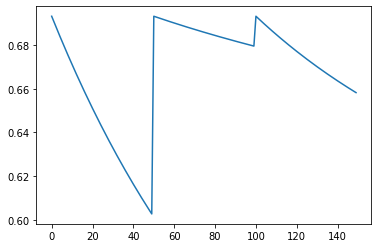

3 751 4
Accuracy on txt1 : 0.00395778364116095
12 3303 1
Accuracy on txt2 : 0.9960796139927623
1 1684 68
Accuracy on txt3:  0.0387906446092413
overall accuracy:  0.5790286596876609
--------------
sgd iteration on class  0
sgd iteration on class  1
sgd iteration on class  2


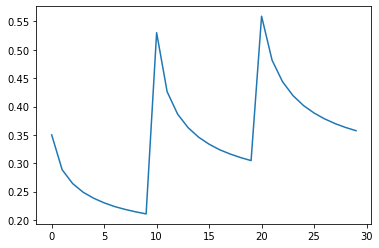

330 248 180
Accuracy on txt1 : 0.43535620052770446
43 3107 166
Accuracy on txt2 : 0.9369722557297949
30 296 1427
Accuracy on txt3:  0.814033086138049
overall accuracy:  0.8347348549854128
--------------


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def crossEntropy(w,x):
    xw=np.dot(x,w)
    return sigmoid(xw)
    

def crossEntropyLoss(w,x,y):
    h=crossEntropy(w,x)
    n=len(y)
    loss=1/n * np.sum(-y*np.log(h)-(1-y)*np.log(1-h))
    
    gradient=1/n*(np.dot(h-y,x))
    
    return loss,gradient

def crossEntropyLoss_sgd(w,x,y):
    h=crossEntropy(w,x)
    
    loss= (-y*np.log(h)-(1-y)*np.log(1-h))
    
    gradient=(np.dot(h-y,x))
    
    return loss,gradient

def fit_gd(x,y,iteration=50,stepsize=0.1):
    
    
    aLoss=[]
    aW=[]
    for i in range(3):
        yThis=y[:,i]
        print("gd iteration on class ",i)
        w=np.zeros(x.shape[1])
        loss=np.zeros(iteration)
        for j in range(iteration):
            loss[j],gradient=crossEntropyLoss(w,x,yThis)
            w-=gradient*stepsize
        aLoss.append(loss)
        aW.append(w)
    return aW,aLoss

def fit_sgd(x,y,iteration=10,stepsize=0.1):
    aLoss=[]
    aW=[]
    for i in range(3):
        print("sgd iteration on class ",i)
        w=np.zeros(x.shape[1])
        loss=np.zeros(iteration)
        for j in range(iteration):
            
            randomIndex=np.random.permutation(x.shape[0])
            xRand=x[randomIndex,:]
            yRand=y[randomIndex,:]
            yThis=yRand[:,i]
            
            lossThis=0
            for k in range(xRand.shape[0]):
                xk=xRand[k,:]
                yk=yThis[k]
                lossThis,gradient=crossEntropyLoss_sgd(w,xk,yk)
                w-=gradient*stepsize
                loss[j]+=lossThis
            stepsize*=0.9
            loss[j]/=xRand.shape[0]
            gc.collect()
            
        aLoss.append(loss)
        aW.append(w)
    return aW,aLoss


def predict(x,aW):
    y=np.zeros((x.shape[0],3))
    
    for i in range(x.shape[0]):
        result=[sigmoid(np.dot(x[i],w)) for w in aW]
        y[i][np.argmax(result)]=1
    return y

def counting(py):
    r1=0
    r2=0
    r3=0
    for i in py:
        if int(i[0])==1:
            r1+=1
        elif int(i[1])==1:
            r2+=1
        elif int(i[2])==1:
            r3+=1
    print(r1,r2,r3)
    return [r1,r2,r3]


def sgd():
    aW,loss=fit_sgd(xTrain,yTrain)
    loss=list(loss[0])+list(loss[1])+list(loss[2])
    plt.plot(loss)
    plt.show()
    py1=predict(x1E,aW)
    py2=predict(x2E,aW)
    py3=predict(x3E,aW)
    sum=0
    r1,r2,r3=counting(py1)
    sum=sum+r1+r2+r3
    print("Accuracy on txt1 :",r1/(r1+r2+r3))
    rr1=r1
    r1,r2,r3=counting(py2)
    sum=sum+r1+r2+r3
    print("Accuracy on txt2 :",r2/(r1+r2+r3))
    rr2=r2
    r1,r2,r3=counting(py3)
    sum=sum+r1+r2+r3
    print("Accuracy on txt3: ",r3/(r1+r2+r3))
    rr3=r3
    print("overall accuracy: ",(rr1+rr2+rr3)/sum)
    print("--------------")
    
    
def gd():
    aW,loss=fit_gd(xTrain,yTrain)
    loss=list(loss[0])+list(loss[1])+list(loss[2])
    plt.plot(loss)
    plt.show()
    py1=predict(x1E,aW)
    py2=predict(x2E,aW)
    py3=predict(x3E,aW)
    sum=0
    r1,r2,r3=counting(py1)
    sum=sum+r1+r2+r3
    print("Accuracy on txt1 :",r1/(r1+r2+r3))
    rr1=r1
    r1,r2,r3=counting(py2)
    sum=sum+r1+r2+r3
    print("Accuracy on txt2 :",r2/(r1+r2+r3))
    rr2=r2
    r1,r2,r3=counting(py3)
    sum=sum+r1+r2+r3
    print("Accuracy on txt3: ",r3/(r1+r2+r3))
    rr3=r3
    print("overall accuracy: ",(rr1+rr2+rr3)/sum)
    print("--------------")

gd()
gc.collect()
sgd()




# 3. MLP

Using tensorflow and keras to build a MLP to classify the txt file.<br>
Since keras do not support gradient decent optimizer, I use adam instead.<br>

In [7]:
from tensorflow import keras

import tensorflow as tf
print (tf.__version__)

1.14.0


In [8]:
model = keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(3,activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)


W0920 23:36:44.685364 11020 deprecation.py:506] From C:\Users\gzha\AppData\Local\Continuum\anaconda3\envs\tfb\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
def predict_mlp(x,model):
    result=model.predict(x)
    y=np.zeros((x.shape[0],3))
    for i in range(x.shape[0]):
        y[i][np.argmax(result[i])]=1
    return y

Implemented a 5 fold cross validation here.

In [10]:
n=xTrain.shape[0]

xt2=[xTrain[int((i)*n/5):int((i+1)*n/5)] for i in range(5)]
yt2=[yTrain[int((i)*n/5):int((i+1)*n/5)] for i in range(5)]
for i in range(5):
    xt=[]
    yt=[]
    xe=xt2[i]
    ye=yt2[i]
    for j in range(5):
        if j!=i:
            xt+=list(xt2[j])
            yt+=list(yt2[j])
    xt=np.array(xt)
    yt=np.array(yt)
    model.fit(xt,yt,epochs=2, batch_size=1000)
    y=predict_mlp(xe,model)
    correct=0
    
    for m in range(ye.shape[0]):
        comp=1
        for n in range(3):
            if int(y[m][n])!=int(ye[m][n]):
                comp=0
        correct+=comp
    print("Estimate accuracy: ",correct/ye.shape[0])

Epoch 1/2
10873/10873 [==============================] - 3s 289us/sample - loss: 0.9524 - acc: 0.6123
Epoch 2/2
10873/10873 [==============================] - 2s 195us/sample - loss: 0.5343 - acc: 0.7450
Estimate accuracy:  0.34473877851361295
Epoch 1/2
10873/10873 [==============================] - 2s 220us/sample - loss: 0.8066 - acc: 0.8096
Epoch 2/2
10873/10873 [==============================] - 2s 213us/sample - loss: 0.4724 - acc: 0.8160
Estimate accuracy:  0.9701986754966887
Epoch 1/2
10873/10873 [==============================] - 2s 207us/sample - loss: 0.3625 - acc: 0.8216
Epoch 2/2
10873/10873 [==============================] - 2s 196us/sample - loss: 0.2821 - acc: 0.8529
Estimate accuracy:  0.9742457689477557
Epoch 1/2
10873/10873 [==============================] - 2s 201us/sample - loss: 0.2136 - acc: 0.9360
Epoch 2/2
10873/10873 [==============================] - 2s 203us/sample - loss: 0.1468 - acc: 0.9637
Estimate accuracy:  0.9610007358351729
Epoch 1/2
10872/10872 [====

In [11]:
sum=0
y=predict_mlp(x1E,model)
r1,r2,r3=counting(y)
sum=sum+r1+r2+r3
print("Accuracy on txt1 :",r1/(r1+r2+r3))
rr1=r1
y=predict_mlp(x2E,model)
r1,r2,r3=counting(y)
sum=sum+r1+r2+r3
print("Accuracy on txt2 :",r2/(r1+r2+r3))
rr2=r2
y=predict_mlp(x3E,model)
r1,r2,r3=counting(y)
sum=sum+r1+r2+r3
print("Accuracy on txt3: ",r3/(r1+r2+r3))
rr3=r3
print("overall accuracy: ",(rr1+rr2+rr3)/sum)



570 133 55
Accuracy on txt1 : 0.7519788918205804
148 3148 20
Accuracy on txt2 : 0.9493365500603136
153 61 1539
Accuracy on txt3:  0.8779235596120936
overall accuracy:  0.902179509181397


# 4. Result

The result are:<br>
<br>
for logistic regression with gradient descent:<br>
Accuracy on txt1 : 0.00395778364116095<br>
Accuracy on txt2 : 0.9960796139927623<br>
Accuracy on txt3:  0.0387906446092413<br>
overall accuracy:  0.5790286596876609<br>
<br>
for logistic regression with stochastic gradient descent:<br>
Accuracy on txt1 : 0.43535620052770446<br>
Accuracy on txt2 : 0.9369722557297949<br>
Accuracy on txt3:  0.814033086138049<br>
overall accuracy:  0.8347348549854128<br>
<br>
for MLP:<br>
Accuracy on txt1 : 0.7519788918205804<br>
Accuracy on txt2 : 0.9493365500603136<br>
Accuracy on txt3:  0.8779235596120936<br>
overall accuracy:  0.902179509181397<br>
<br>
MLP has the best result. LR with gradient descent seems to be trapped by a local minimum. Stochastic gradient descent has a much better result. Among all three files the txt1 has the lowest classified rate. <br>